In [ ]:
%%sh

pip install yargy # для обработки текста 
pip install natasha # для обработки текста 
pip install wordcloud # для создания изображения с облаком тегов

  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26119 sha256=30ef7a2a7f47f49ed6c2c184feb873fb5588a1a2521c6eba80044820343c7e08
  Stored in directory: /root/.cache/pip/wheels/16/85/bd/1001cbb46dcfb71c2001cd7401c6fb250392f22a81ce3722f7
Successfully built intervaltree
  Attempting uninstall: intervaltree
    Found existing installation: intervaltree 2.1.0
    Uninstalling intervaltree-2.1.0:
      Successfully uninstalled intervaltree-2.1.0


In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

html = urlopen('https://www.herzen.spb.ru/main/facts/nowadays/1558542985/1559574321/')
bs = BeautifulSoup(html.read(), 'html.parser')
# print(bs)

In [ ]:
import re

In [ ]:
news_href = []
for news in bs.find_all(href=re.compile("https://www.herzen.spb.ru/news/*")):
  # print(news.get('href'))
  news_href.append(news.get('href'))
print(news_href) # получили список ссылок на новости

['https://www.herzen.spb.ru/news/31-07-2020/', 'https://www.herzen.spb.ru/news/15-11-2019_10/', 'https://www.herzen.spb.ru/news/15-11-2019_1/', 'https://www.herzen.spb.ru/news/06-11-2019_6/', 'https://www.herzen.spb.ru/news/31-10-2019_1/', 'https://www.herzen.spb.ru/news/30-10-2019_3/', 'https://www.herzen.spb.ru/news/30-10-2019_4/', 'https://www.herzen.spb.ru/news/30-10-2019_5/', 'https://www.herzen.spb.ru/news/14-10-2019_7/', 'https://www.herzen.spb.ru/news/17-10-2019_6/', 'https://www.herzen.spb.ru/news/07-09-2019/', 'https://www.herzen.spb.ru/news/23-08-2019_2/', 'https://www.herzen.spb.ru/news/19-08-2019_2/', 'https://www.herzen.spb.ru/news/19-08-2019/', 'https://www.herzen.spb.ru/news/16-08-2019_1/', 'https://www.herzen.spb.ru/news/12-08-2019_3/', 'https://www.herzen.spb.ru/news/12-08-2019_2/', 'https://www.herzen.spb.ru/news/12-08-2019/', 'https://www.herzen.spb.ru/news/12-08-2019_1/', 'https://www.herzen.spb.ru/news/26-08-2019/', 'https://www.herzen.spb.ru/news/06-08-2019/', 'h

In [ ]:
#for link in news_href:
#  page = urlopen(link)
#  raw_page = BeautifulSoup(page.read(), 'html.parser')
#  print(raw_page)


page = urlopen(news_href[0])
raw_page = BeautifulSoup(page.read(), 'html.parser')
# print(raw_page)
news_table = raw_page.find(class_='blockwh')
# print(news_table)
news_text_arr = news_table.find_all('p')
# print(news_text_arr)
news_text = ""
for i in range(3,len(news_text_arr)):
  news_text+=(str(news_text_arr[i].contents[0]))

print(news_text)


В этом году пандемия внесла коррективы во многие планы. Однако все равно не смогла помешать открытию вторых летних Педагогических сезонов.Открытие состоялось в формате онлайн, к которому за последние месяцы мы все уже привыкли. Тем более, что тема первой дискуссии – Старт первым Сезонам в прошлом году давал губернатор Санкт-Петербурга. В этом году с вступительным словом к участникам, партнерам и организаторам проекта обратился <em>«Мне почётно быть в партнерстве с вами, с теми, кто действительно делает актуальную педагогику в нашем городе, готовит и выпускает учителей, и кто олицетворяет одну из старейших и развитых педагогических школ нашей страны</em>Анализируя опыт Сезонов прошлого года, вице-губернатор сказал, что Герценовский университет показал возможности контактной педагогики, в очередной раз став активным участником жизни города.Ректор РГПУ им. А. И. Герцена Он также анонсировал открытие 1 сентября «Точки кипения» — живого пространства для встреч и общения и пообещал, что прог

In [ ]:
"""
news_text = raw_page.find_all('p')
post = ''
for el in news_text:
  post+=el.get_text()
#  print(el.get_text())
# print(news_text)
#print(post)
# a = re.split(r'\n',post)
"""

from natasha import (
    Segmenter,
    MorphVocab,
    
    NewsEmbedding,
    NewsMorphTagger,
    NewsSyntaxParser,
    NewsNERTagger,
    
    PER,
    NamesExtractor,

    Doc
)

segmenter = Segmenter()
morph_vocab = MorphVocab()

emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
syntax_parser = NewsSyntaxParser(emb)
ner_tagger = NewsNERTagger(emb)

names_extractor = NamesExtractor(morph_vocab)

doc = Doc(news_text)
doc.segment(segmenter)
doc.tag_morph(morph_tagger)
doc.parse_syntax(syntax_parser)

doc.tag_ner(ner_tagger)

for span in doc.spans:
    span.normalize(morph_vocab)
    
for token in doc.tokens:
  token.lemmatize(morph_vocab)
print({_.text: _.lemma for _ in doc.tokens})



{'В': 'в', 'этом': 'этот', 'году': 'год', 'пандемия': 'пандемия', 'внесла': 'внести', 'коррективы': 'корректив', 'во': 'в', 'многие': 'многий', 'планы': 'план', '.': '.', 'Однако': 'однако', 'все': 'весь', 'равно': 'равный', 'не': 'не', 'смогла': 'смочь', 'помешать': 'помешать', 'открытию': 'открытие', 'вторых': 'второй', 'летних': 'летний', 'Педагогических': 'педагогический', 'сезонов': 'сезон', 'Открытие': 'открытие', 'состоялось': 'состояться', 'в': 'в', 'формате': 'формат', 'онлайн': 'онлайн', ',': ',', 'к': 'к', 'которому': 'который', 'за': 'за', 'последние': 'последний', 'месяцы': 'месяц', 'мы': 'мы', 'уже': 'уже', 'привыкли': 'привыкнуть', 'Тем': 'тот', 'более': 'более', 'что': 'что', 'тема': 'тема', 'первой': 'первый', 'дискуссии': 'дискуссия', '–': '–', 'Старт': 'старт', 'первым': 'первый', 'Сезонам': 'сезон', 'прошлом': 'прошлый', 'давал': 'давать', 'губернатор': 'губернатор', 'Санкт-Петербурга': 'санкт-петербург', 'с': 'с', 'вступительным': 'вступительный', 'словом': 'слово'

In [ ]:
import string
frequency = {}
text_string = news_text.lower()
match_pattern = re.findall(r'\b[а-я]{3,15}\b', text_string)
for word in match_pattern:
    count = frequency.get(word,0)
    frequency[word] = count + 1

# print(frequency)    

max = 0
frequency_sort = {}
for el in frequency:
  if frequency[el] >= max:
    frequency_sort[el] = frequency[el] 
    max = frequency[el]


print('Топ 5 слов')
for i in frequency_sort:
  print(frequency_sort[i], "-", i)

 




#for words in frequency_list:
#    print(words, frequency[words])

Топ 5 слов
2 - этом
4 - году
5 - педагогических
5 - сезонов
7 - что


In [ ]:
from wordcloud import WordCloud

doc.ner.print()

В этом году пандемия внесла коррективы во многие планы. Однако все 
равно не смогла помешать открытию вторых летних Педагогических 
сезонов.Открытие состоялось в формате онлайн, к которому за последние 
месяцы мы все уже привыкли. Тем более, что тема первой дискуссии – 
Старт первым Сезонам в прошлом году давал губернатор Санкт-Петербурга.
             PER────                                 LOC───────────── 
 В этом году с вступительным словом к участникам, партнерам и 
организаторам проекта обратился <em>«Мне почётно быть в партнерстве с 
вами, с теми, кто действительно делает актуальную педагогику в нашем 
городе, готовит и выпускает учителей, и кто олицетворяет одну из 
старейших и развитых педагогических школ нашей страны</em>Анализируя 
опыт Сезонов прошлого года, вице-губернатор сказал, что Герценовский 
                                                        ORG──────────
университет показал возможности контактной педагогики, в очередной раз
───────────                         

In [ ]:
for span in doc.spans:
    span.normalize(morph_vocab)
print(doc.spans[:5])

names = {_.text: _.normal for _ in doc.spans} # именованные сущности из новостной статьи 
print(names)
namesList = list(names.keys())
#print(namesList)
namesStr = ""
for el in namesList:
  namesStr = namesStr + ' ' + el
print(namesStr)
frequencyList = list(frequency_sort.keys())
wordsStr = ""
for el in frequencyList:
  wordsStr = wordsStr + ' ' + el
print(wordsStr)
#print(frequencyList)


[DocSpan(start=280, stop=287, type='PER', text='Сезонам', tokens=[...], normal='Сезонам'), DocSpan(start=320, stop=336, type='LOC', text='Санкт-Петербурга', tokens=[...], normal='Санкт-Петербург'), DocSpan(start=728, stop=752, type='ORG', text='Герценовский университет', tokens=[...], normal='Герценовский университет'), DocSpan(start=857, stop=882, type='ORG', text='РГПУ им. А. И. Герцена Он', tokens=[...], normal='РГПУ имя. А. И. Герцена Он'), DocSpan(start=1029, stop=1044, type='PER', text='Сергей Игоревич', tokens=[...], normal='Сергей Игоревич')]
{'Сезонам': 'Сезонам', 'Санкт-Петербурга': 'Санкт-Петербург', 'Герценовский университет': 'Герценовский университет', 'РГПУ им. А. И. Герцена Он': 'РГПУ имя. А. И. Герцена Он', 'Сергей Игоревич': 'Сергей Игоревич', 'Мойке': 'Мойке', 'Герценовского университета': 'Герценовский университет'}
 Сезонам Санкт-Петербурга Герценовский университет РГПУ им. А. И. Герцена Он Сергей Игоревич Мойке Герценовского университета
 этом году педагогических 

(-0.5, 399.5, 199.5, -0.5)

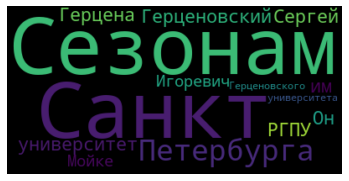

In [ ]:
wc1 = WordCloud().generate(namesStr)
import matplotlib.pyplot as plt
plt.imshow(wc1, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

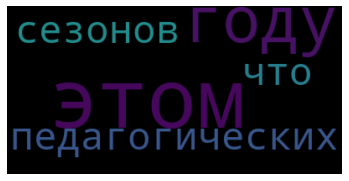

In [ ]:
wc2 = WordCloud().generate(wordsStr)
import matplotlib.pyplot as plt
plt.imshow(wc2, interpolation='bilinear')
plt.axis("off")